<a href="https://colab.research.google.com/github/nvgruel123/ScrollMagic/blob/master/RNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import pandas_datareader.data as web
import h5py
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [0]:
stock_name = '^GSPC'
seq_len = 22
d = 0.2
shape = [4, seq_len, 1] # feature, window, output
neurons = [256, 256, 16, 1]
epochs = 300
decay = 0.1
batch_size = 512

In [0]:
def get_stock_data(stock_name, normalize=True):
    start = datetime.datetime(1971, 1, 1)
    end = datetime.date.today()
    df = web.DataReader(stock_name, "yahoo", start, end)
    df['Average'] = (df['High'] + df['Low']) / 2
    df = df[['Volume', 'Open', 'Average', 'Adj Close']]
    result = df.values
    
    if normalize:        
        min_max_scaler = preprocessing.MinMaxScaler()
#         df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
#         df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
#         df['Average'] = min_max_scaler.fit_transform(df.Average.values.reshape(-1,1))
#         df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
        result = min_max_scaler.fit_transform(df.values.reshape(-1,4))
    return result
 
df = get_stock_data(stock_name, normalize=True)

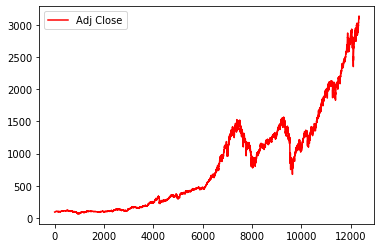

In [0]:
def plot_stock(stock_name):
    df = get_stock_data(stock_name, normalize=False)
    plt.plot(df[:,-1], color='red', label='Adj Close')
    plt.legend(loc='best')
    plt.show()
plot_stock(stock_name)

In [0]:
def load_data(data, seq_len):
    amount_of_features = data.shape[1]
    sequence_length = seq_len # index starting from 0
    X = []
                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
    for index in range(data.shape[0] - sequence_length - 2): # maxmimum date = lastest date - sequence length
        X.append(data[index: index + sequence_length]) # index : index + 22days
        
    y = data[seq_len + 2:,3]
    X,y = np.array(X), np.array(y)
    
    X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)
    
    return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = load_data(df, seq_len)

In [0]:
df[:26]

array([[0.00023321, 0.00974497, 0.00957063, 0.00939975],
       [0.00045943, 0.00941873, 0.00959348, 0.00961138],
       [0.00084026, 0.00963079, 0.00984319, 0.00979045],
       [0.00079658, 0.00981022, 0.00992643, 0.00980022],
       [0.00059045, 0.00982001, 0.00986277, 0.00973836],
       [0.0006446 , 0.00975802, 0.00970609, 0.00966999],
       [0.00091537, 0.00968951, 0.0099101 , 0.00991092],
       [0.00102455, 0.00993093, 0.01001293, 0.00985882],
       [0.00089616, 0.00987873, 0.00992969, 0.00993697],
       [0.00093197, 0.00995703, 0.01011901, 0.01001185],
       [0.000704  , 0.01003207, 0.01020878, 0.01013558],
       [0.00073894, 0.01015605, 0.01027243, 0.01024953],
       [0.00095992, 0.01027023, 0.01034914, 0.01025604],
       [0.00102368, 0.01027675, 0.01038831, 0.01038954],
       [0.00125252, 0.01041052, 0.01065761, 0.01061419],
       [0.00102281, 0.01063563, 0.01075553, 0.01074443],
       [0.00122632, 0.01076612, 0.01091221, 0.01084536],
       [0.00116168, 0.01086726,

In [0]:
X_train[0], y_train[0]

(array([[0.00023321, 0.00974497, 0.00957063, 0.00939975],
        [0.00045943, 0.00941873, 0.00959348, 0.00961138],
        [0.00084026, 0.00963079, 0.00984319, 0.00979045],
        [0.00079658, 0.00981022, 0.00992643, 0.00980022],
        [0.00059045, 0.00982001, 0.00986277, 0.00973836],
        [0.0006446 , 0.00975802, 0.00970609, 0.00966999],
        [0.00091537, 0.00968951, 0.0099101 , 0.00991092],
        [0.00102455, 0.00993093, 0.01001293, 0.00985882],
        [0.00089616, 0.00987873, 0.00992969, 0.00993697],
        [0.00093197, 0.00995703, 0.01011901, 0.01001185],
        [0.000704  , 0.01003207, 0.01020878, 0.01013558],
        [0.00073894, 0.01015605, 0.01027243, 0.01024953],
        [0.00095992, 0.01027023, 0.01034914, 0.01025604],
        [0.00102368, 0.01027675, 0.01038831, 0.01038954],
        [0.00125252, 0.01041052, 0.01065761, 0.01061419],
        [0.00102281, 0.01063563, 0.01075553, 0.01074443],
        [0.00122632, 0.01076612, 0.01091221, 0.01084536],
        [0.001

In [0]:
def build_model2(layers, neurons, d, decay):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[2]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    adam = keras.optimizers.Adam(decay=decay)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model
 
model = build_model2(shape, neurons, d, decay)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 22, 256)           267264    
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 256)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                4112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 796,705
Trainable params: 796,705
Non-trainable params: 0
________________________________________________

In [0]:
history=model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=epochs,
    validation_split=0.1,
    shuffle=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8864 samples, validate on 985 samples
Epoch 1/300
5888/8864 [==================>...........] - ETA: 1s - loss: 0.0126 - acc: 0.0000e+00

KeyboardInterrupt: ignored

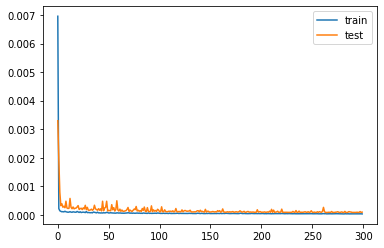

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [0]:
import matplotlib.pyplot as plt2
predicted_result = model.predict(X_test)

plt2.plot(predicted_result[-90:], color='red', label='Prediction')
plt2.plot(y_test[-90:],color='blue', label='Actual')
plt2.legend(loc='best')
plt2.title('The test result for {}'.format(stock_name))
plt2.xlabel('Days')
plt2.ylabel('Adjusted Close')
plt2.show()

NameError: ignored

In [0]:
def model_score(model, X_train, y_train, X_test, y_test):
#其实这里只需要传入X_test和y_test即可，只是为了和上面格式保持一致因而也将X_train和y_train传入了    
    y_hat = model.predict(X_test)
    y_t=y_test.reshape(-1,1)
    
    temp = pd.DataFrame(y_hat)  
    temp['yhat']=y_hat
    temp['y']=y_t
    temp_rmse = sqrt(mean_squared_error(temp.y,temp.yhat))
    temp_mse=mean_squared_error(temp.y,temp.yhat)
    print('TEMP RMSE: %.3f' % temp_rmse)
    print('TEMP MSE: %.3f' % temp_mse)
    return temp_rmse,temp_mse
 
model_score(model, X_train, y_train, X_test, y_test)







TEMP RMSE: 0.645
TEMP MSE: 0.416


(0.6449108362520832, 0.41590998671536134)

In [0]:
def quick_measure(stock_name, seq_len, d, shape, neurons, epochs, decay):
    df = get_stock_data(stock_name)
    X_train, X_test, y_train, y_test = load_data(df, seq_len)
    model = build_model2(shape, neurons, d, decay)
    model.fit(X_train, y_train, batch_size=512, epochs=epochs, validation_split=0.1, verbose=1)
    # model.save('LSTM_Stock_prediction-20170429.h5')
    trainScore, testScore = model_score(model, X_train, y_train, X_test, y_test)
    return trainScore, testScore

In [0]:
dlist = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
neurons_LSTM = [32, 64, 128, 256, 512, 1024, 2048]
dropout_result = {}
 
for d in dlist:    
    trainScore, testScore = quick_measure(stock_name, seq_len, d, shape, neurons, epochs, decay)
    dropout_result[d] = testScore
 
min_val = min(dropout_result.values())
min_val_key = [k for k, v in dropout_result.items() if v == min_val]


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 22, 256)           267264    
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                4112      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 796,705
Trainable params: 796,705
Non-trainable params: 0
________________________________________________

In [0]:
print (dropout_result)
print (min_val_key)

{0.2: 0.001286035325368157, 0.3: 0.002027867798531647, 0.4: 0.0006707537255025533, 0.5: 0.00245526851124072, 0.6: 0.0031540509690867937, 0.7: 0.009109958880244176, 0.8: 0.02553420945291733}
[0.4]


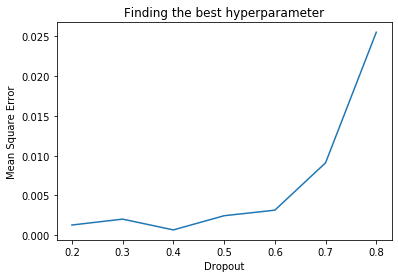

In [0]:
lists = sorted(dropout_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Dropout')
plt.ylabel('Mean Square Error')
plt.show()

In [0]:
stock_name = '^GSPC'
seq_len = 22
shape = [4, seq_len, 1] # feature, window, output
epochs = 90
dropout = 0.2
neuronlist1 = [32, 64, 128, 256, 512]
neuronlist2 = [16, 32, 64]
neurons_result = {}
 
for neuron_lstm in neuronlist1:
    neurons = [neuron_lstm, neuron_lstm]
    for activation in neuronlist2:
        neurons.append(activation)
        neurons.append(1)
        trainScore, testScore = quick_measure(stock_name, seq_len, d, shape, neurons, epochs, decay)
        neurons_result[str(neurons)] = testScore
        neurons = neurons[:2]

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 22, 32)            4736      
_________________________________________________________________
dropout_23 (Dropout)         (None, 22, 32)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 13,601
Trainable params: 13,601
Non-trainable params: 0
_________________________________________________

In [0]:
lists = sorted(neurons_result.items())
x,y = zip(*lists)
 
plt.title('Finding the best hyperparameter')
plt.xlabel('neurons')
plt.ylabel('Mean Square Error')
 
plt.bar(range(len(lists)), y, align='center')
plt.xticks(range(len(lists)), x)
plt.xticks(rotation=90)
 
plt.show()

In [0]:
lists